In [108]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
import math
from collections import defaultdict
import random
from matplotlib.pyplot import figure
from sklearn import preprocessing

In [2]:
noisyDF= pd.read_csv('train.csv')
print(noisyDF.columns)
noisyDF.head()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [61]:
def checkNAN(df):
    missVals= dict()
    cols= df.columns
    for col in cols:
        percentMissing= df[col].isna().sum()/len(df[col]) * 100.00
        if percentMissing > 0.00:
            missVals[col]= '{:5.4f}'.format(percentMissing)+ '%'
    if len(missVals.keys()) == 0:
        return 'You got a clean Dataframe'
    return missVals

def majorMissing(df):
    missVals= dict()
    cols= df.columns
    for col in cols:
        percentMissing= df[col].isna().sum()/len(df[col]) * 100.00
        if percentMissing > 50.00:
            missVals[col]= '{:5.4f}'.format(percentMissing) + '%'
    return missVals

def missColType(df):
    missType= dict()
    cols= df.columns
    missVals= checkNAN(df)
    for key in missVals.keys():
        missType[key]= df[key].dtype
    return missType   

def graphDiscrete(df, col):
    xs= list(pd.unique(df[col]))
    vals= OrderedDict([(x,0) for x in xs])
    for x in df[col]:
        if math.isnan(x):
            continue
        vals[x]+=1
    sns.set_style('dark')
    graph= plt.scatter(vals.keys(),vals.values())
    graph= plt.title('Discrete Data')
    graph= plt.xlabel(col)
    graph= plt.ylabel('Count')
    return graph

def getNumeric(df):
    dtypes= list()
    for col in df.columns:
        if col == 'Id':
            continue
        if str(df[col].dtype) == 'float64' or str(df[col].dtype) == 'int64':
            dtypes.append(col)
    return dtypes

def getCateg(df, cats):
    ret= defaultdict(list)
    for cat in cats:
        ret[cat]= [item for item in df[cat].unique()]
    return dict(ret)

def fixDiscrete(df, miss):
    for col in miss:
        median= df[col].median()
        df[col]= df[col].fillna(median)
    return df

def getClassProp(row):
    if math.isnan(row):
        wow= 1
    uniq[row]+= 1
    
def fixCateg(df, cols):
    for col in cols:    
        uniq= list(pd.unique(df[col].dropna()))
    #     uniq= uniq.remove('nan')
        prop= {key : math.floor((1 -(noisyDF[col] == key).sum()/len(noisyDF[col]))*100.00) for key in uniq}
        classes= list(key for key,value in prop.items() for i in range(value))
        indexes= df[df[col].isnull()].index.tolist()
        for i in indexes:
            rand= random.randint(0, len(classes)-1)
            df[col][i]= classes[rand]
    return df

# -------------------------------------------------------------------------------------------------------------
# Missing Data Analysis

In [4]:
pprint(majorMissing(noisyDF))

{'Alley': '93.7671%',
 'Fence': '80.7534%',
 'MiscFeature': '96.3014%',
 'PoolQC': '99.5205%'}


## So we have 4 features which are missing more than 50% of data. I will drop these features from the dataset. 

In [5]:
noisyDF= noisyDF.drop(['Alley','Fence','MiscFeature','PoolQC'], axis= 1)

## Now that we have got rid of major missing features, we fix other features with missing data

In [6]:
pprint(checkNAN(noisyDF))

{'BsmtCond': '2.5342%',
 'BsmtExposure': '2.6027%',
 'BsmtFinType1': '2.5342%',
 'BsmtFinType2': '2.6027%',
 'BsmtQual': '2.5342%',
 'Electrical': '0.0685%',
 'FireplaceQu': '47.2603%',
 'GarageCond': '5.5479%',
 'GarageFinish': '5.5479%',
 'GarageQual': '5.5479%',
 'GarageType': '5.5479%',
 'GarageYrBlt': '5.5479%',
 'LotFrontage': '17.7397%',
 'MasVnrArea': '0.5479%',
 'MasVnrType': '0.5479%'}


## FireplaceQu is missing 47% of data. So we will drop this one too.

In [7]:
noisyDF= noisyDF.drop(['FireplaceQu'], axis= 1)

In [8]:
pprint(checkNAN(noisyDF))

{'BsmtCond': '2.5342%',
 'BsmtExposure': '2.6027%',
 'BsmtFinType1': '2.5342%',
 'BsmtFinType2': '2.6027%',
 'BsmtQual': '2.5342%',
 'Electrical': '0.0685%',
 'GarageCond': '5.5479%',
 'GarageFinish': '5.5479%',
 'GarageQual': '5.5479%',
 'GarageType': '5.5479%',
 'GarageYrBlt': '5.5479%',
 'LotFrontage': '17.7397%',
 'MasVnrArea': '0.5479%',
 'MasVnrType': '0.5479%'}


## To fix the missing features, we need to first check the data types of the features.

In [9]:
pprint(missColType(noisyDF))

{'BsmtCond': dtype('O'),
 'BsmtExposure': dtype('O'),
 'BsmtFinType1': dtype('O'),
 'BsmtFinType2': dtype('O'),
 'BsmtQual': dtype('O'),
 'Electrical': dtype('O'),
 'GarageCond': dtype('O'),
 'GarageFinish': dtype('O'),
 'GarageQual': dtype('O'),
 'GarageType': dtype('O'),
 'GarageYrBlt': dtype('float64'),
 'LotFrontage': dtype('float64'),
 'MasVnrArea': dtype('float64'),
 'MasVnrType': dtype('O')}


## The classification of datatypes for the missing features are:
### Numerical :
1. GarageYrBuilt
2. LotFrontage
3. MasVnrArea

### Categorical:
1. BsmtCond
2. BsmtExposure
3. BsmtFinType1
4. BsmtFinType2
5. BsmtQual
6. Electrical
7. GarageCond
8. GarageFinish
9. GarageQual
10. GarageType
11. MasVnrType

## Handling Numerical Data
Looking at if the numerical data is continuous or discrete

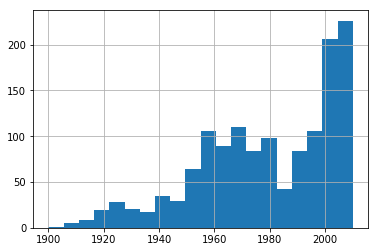

In [10]:
# plt.show(graphDiscrete(noisyDF, 'GarageYrBlt'))
noisyDF.sort_values(inplace= True, by= ['GarageYrBlt'])
noisyDF['GarageYrBlt'].hist(bins=20)

### So the GarageYrBlt is discrete numerical field. Now looking at LotFrontage

The Unique records for LotFrontage: 111
Total number of records for LotFrontage is 1460


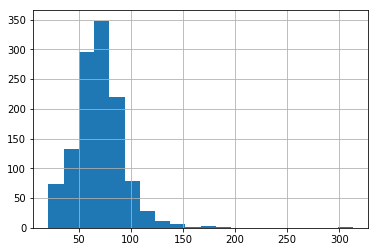

In [11]:
print('The Unique records for LotFrontage:',len(noisyDF['LotFrontage'].unique()))
print('Total number of records for LotFrontage is',len(noisyDF['LotFrontage']))
# plt.show(graphDiscrete(noisyDF, 'LotFrontage'))
noisyDF['LotFrontage'].hist(bins= 20)

### As it is clearly seen, the total records for LotFrontage are 1460. The unique values for LotFrontage is lot less than that. So I think it is safe to say that LotFrontage is also a discrete numerical field.

### Last remaining feature is MasVnrArea

328
1460


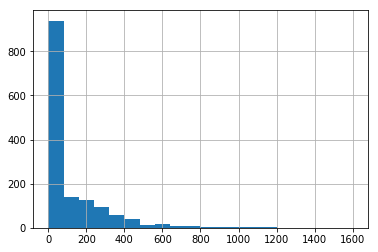

In [12]:
print(len(noisyDF['MasVnrArea'].unique()))
pprint(len(noisyDF['MasVnrArea']))
# plt.show(graphDiscrete(noisyDF, 'MasVnrArea'))
noisyDF['MasVnrArea'].hist(bins=20)

### Looking at the graph, the MasVnrArea is less prone to be a discrete value and more continous
### So, discrete: GarageYrBuilt, LotFrontage, MasVnrArea

## Looking at Categorical Features

In [13]:
missCat= ['BsmtCond',
          'BsmtExposure',
          'BsmtFinType1',
          'BsmtFinType2',
          'BsmtQual',
          'Electrical',
          'GarageCond',
          'GarageFinish',
          'GarageQual',
          'GarageType',
          'MasVnrType']
pprint(getCateg(noisyDF,missCat))

{'BsmtCond': ['Fa', 'TA', 'Po', 'Gd', nan],
 'BsmtExposure': ['Mn', 'No', 'Gd', 'Av', nan],
 'BsmtFinType1': ['Rec', 'Unf', 'ALQ', 'BLQ', 'GLQ', 'LwQ', nan],
 'BsmtFinType2': ['Unf', 'LwQ', 'BLQ', 'Rec', nan, 'ALQ', 'GLQ'],
 'BsmtQual': ['TA', 'Fa', 'Gd', nan, 'Ex'],
 'Electrical': ['SBrkr', 'FuseP', 'FuseA', 'FuseF', 'Mix', nan],
 'GarageCond': ['TA', 'Gd', 'Po', 'Fa', 'Ex', nan],
 'GarageFinish': ['Unf', 'Fin', 'RFn', nan],
 'GarageQual': ['TA', 'Fa', 'Po', 'Gd', 'Ex', nan],
 'GarageType': ['Detchd',
                'Attchd',
                'Basment',
                '2Types',
                'CarPort',
                'BuiltIn',
                nan],
 'MasVnrType': ['None', 'BrkFace', 'Stone', 'BrkCmn', nan]}


### To deal with the categorical variables, I will perform one hot encoding on the features. This will help us avoid ranking bias from our model.

## Fixing Missing Data
### ---------------------------------------------- Numerical Data ---------------------------------------------------------- 

#### Discrete Numerical Values
I will fix the discrete missing values by replacing nan's with the median value for that feature.

In [14]:
discrete= ['GarageYrBlt', 'LotFrontage','MasVnrArea']
noisyDF= fixDiscrete(noisyDF, discrete)

In [15]:
pprint(noisyDF[discrete].isna().sum())

GarageYrBlt    0
LotFrontage    0
MasVnrArea     0
dtype: int64


#### Discrete numerical values are fixed

# Fixing Categorical Data

### -------------------------------------------------- Categorical Data -------------------------------------------------------

In [16]:
pprint(checkNAN(noisyDF))

{'BsmtCond': '2.5342%',
 'BsmtExposure': '2.6027%',
 'BsmtFinType1': '2.5342%',
 'BsmtFinType2': '2.6027%',
 'BsmtQual': '2.5342%',
 'Electrical': '0.0685%',
 'GarageCond': '5.5479%',
 'GarageFinish': '5.5479%',
 'GarageQual': '5.5479%',
 'GarageType': '5.5479%',
 'MasVnrType': '0.5479%'}


## FOCUSING ON BsmtCond

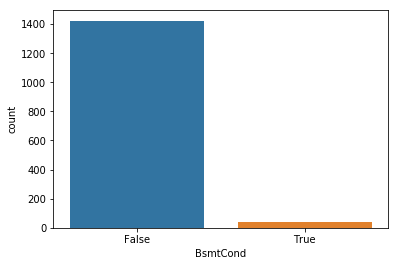

In [17]:
sns.countplot(noisyDF['BsmtCond'].isnull())

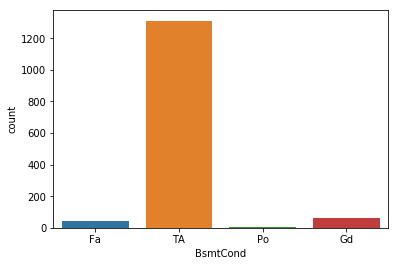

In [18]:
sns.countplot(noisyDF['BsmtCond'])

### The majority class in BsmtCond is TA. To fill in the missing values, I will assign weights to the classes. Majority classes will have less weight and minority classes will have more weight.
#### Grabbing the unique classes in BsmtCond feature. Weights will be assigned based on (1 - classProportion). This will result in majority class having less weights and vice versa. All of this is implemented in the method fixCateg

In [21]:
noisyDF= fixCateg(noisyDF, 'BsmtCond')

C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


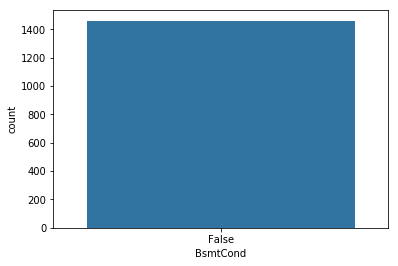

In [22]:
sns.countplot(noisyDF['BsmtCond'].isna())

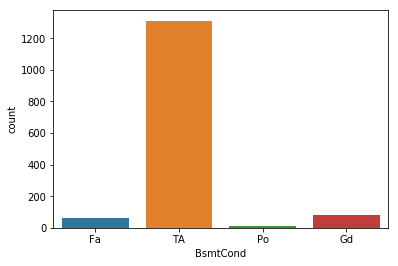

In [23]:
sns.countplot(noisyDF['BsmtCond'])

### BsmtCond no more has missing values and the nan's have been filled according to the weights. Going ahead and doing the same for others

## BsmtExposure

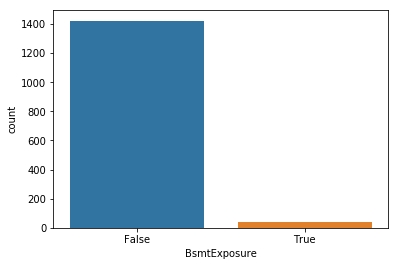

In [24]:
sns.countplot(noisyDF['BsmtExposure'].isna())

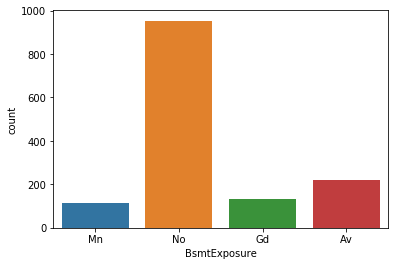

In [25]:
sns.countplot(noisyDF['BsmtExposure'])

In [26]:
noisyDF= fixCateg(noisyDF, 'BsmtExposure')

C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


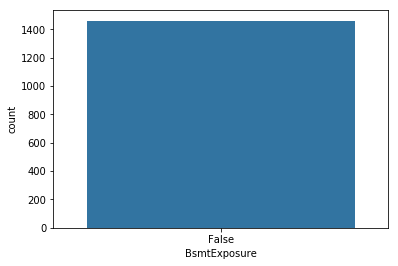

In [27]:
sns.countplot(noisyDF['BsmtExposure'].isna())

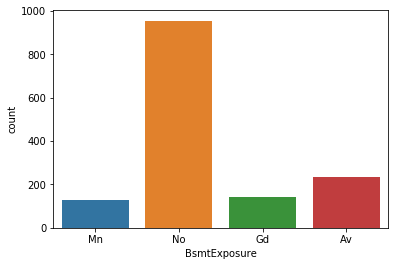

In [28]:
sns.countplot(noisyDF['BsmtExposure'])

## BsmtFinType1

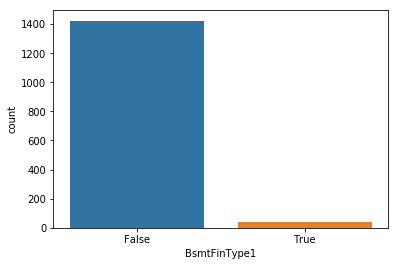

In [29]:
sns.countplot(noisyDF['BsmtFinType1'].isna())

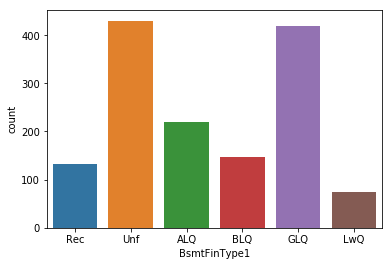

In [30]:
sns.countplot(noisyDF['BsmtFinType1'])

In [31]:
noisyDF= fixCateg(noisyDF,'BsmtFinType1')

C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


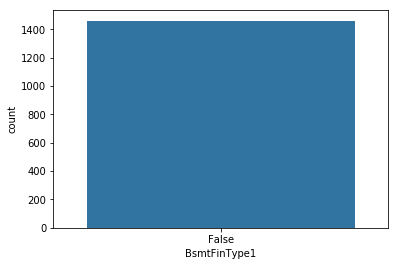

In [32]:
sns.countplot(noisyDF['BsmtFinType1'].isna())

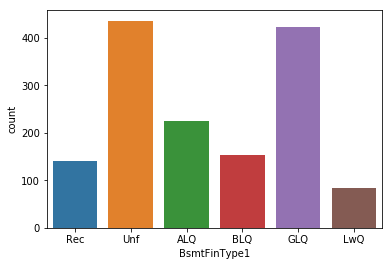

In [33]:
sns.countplot(noisyDF['BsmtFinType1'])

## BsmtFinType2

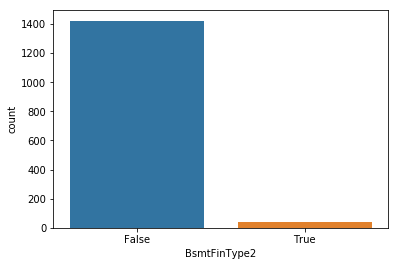

In [35]:
sns.countplot(noisyDF['BsmtFinType2'].isna())

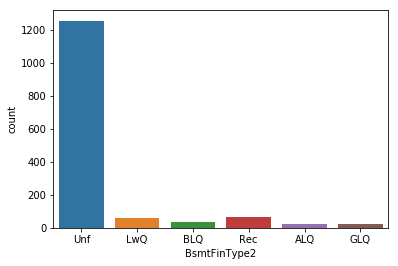

In [43]:
sns.countplot(noisyDF['BsmtFinType2'])

In [37]:
noisyDF= fixCateg(noisyDF, 'BsmtFinType2')

C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


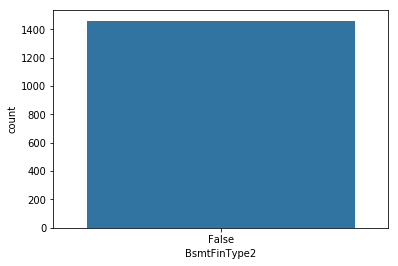

In [41]:
sns.countplot(noisyDF['BsmtFinType2'].isna())

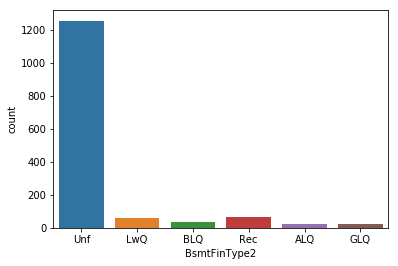

In [42]:
sns.countplot(noisyDF['BsmtFinType2'])

# Going Ahead and fixing all features

In [45]:
noisyDF= fixCateg(noisyDF, ['BsmtQual','Electrical','GarageCond','GarageFinish','GarageQual','GarageType','MasVnrType'])

C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [48]:
checkNAN(noisyDF)

'You got a clean Dataframe'

# Now we have a clean dataframe 

# Our numeric features are not normalized. Let's look at their distributions 

In [104]:
numericCol= getNumeric(noisyDF)

In [105]:
pprint(numericCol)

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']


# For preliminary purposes, I will treat year as a categorical variable.

In [106]:
toBeRemoved= ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
for col in toBeRemoved:
    numericCol.remove(col)

In [107]:
numericCol

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice']

In [109]:
anotherDF= noisyDF.copy(deep= True)

In [110]:
noisyDF[numericCol]= preprocessing.scale(noisyDF[numericCol])

C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [112]:
noisyDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
93,94,3.147673,C (all),-0.447940,-0.332419,Pave,Reg,Lvl,AllPub,Corner,...,-0.359325,-0.116339,1.505949,-0.068692,-0.087688,1.730892,2007,WD,Normal,-0.592092
653,654,-0.163109,RM,-0.447940,-0.019727,Pave,Reg,Lvl,AllPub,Inside,...,3.552410,-0.116339,-0.270208,-0.068692,-0.087688,-0.119110,2008,WD,Normal,-0.578241
848,849,-0.163109,RL,0.233255,3.516107,Pave,IR2,Bnk,AllPub,Inside,...,-0.359325,-0.116339,2.869463,-0.068692,-0.087688,0.990891,2008,WD,Normal,0.743922
740,741,0.309859,RM,-0.447940,-0.091886,Pave,Reg,Lvl,AllPub,Inside,...,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,2007,WD,Abnorml,-0.616017
246,247,3.147673,RM,-0.039223,-0.137788,Pave,Reg,Lvl,AllPub,Inside,...,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,2006,WD,Normal,-0.553057


In [113]:
anotherDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
93,94,190,C (all),60.0,7200,Pave,Reg,Lvl,AllPub,Corner,...,0,0,99,0,0,11,2007,WD,Normal,133900
653,654,50,RM,60.0,10320,Pave,Reg,Lvl,AllPub,Inside,...,239,0,0,0,0,6,2008,WD,Normal,135000
848,849,50,RL,75.0,45600,Pave,IR2,Bnk,AllPub,Inside,...,0,0,175,0,0,9,2008,WD,Normal,240000
740,741,70,RM,60.0,9600,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,5,2007,WD,Abnorml,132000
246,247,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2006,WD,Normal,137000


In [118]:
noisyDF[toBeRemoved]=noisyDF[toBeRemoved].astype('str')

In [120]:
dummiesForDiscrete= pd.get_dummies(noisyDF[toBeRemoved])

In [123]:
noisyDF.append(dummiesForDiscrete)

C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:7116: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,YearRemodAdd_2007,YearRemodAdd_2008,YearRemodAdd_2009,YearRemodAdd_2010,YrSold,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
93,0.251965,1.567462,-0.116339,1.390023,2fmCon,Fa,Mn,1.321134,-0.288653,Rec,...,NaN,NaN,NaN,NaN,2007,NaN,NaN,NaN,NaN,NaN
653,-1.052196,0.838738,-0.116339,0.163779,1Fam,TA,No,-0.973018,-0.288653,Unf,...,NaN,NaN,NaN,NaN,2008,NaN,NaN,NaN,NaN,NaN
848,0.373583,1.613294,-0.116339,2.616266,1Fam,TA,No,-0.973018,-0.288653,Unf,...,NaN,NaN,NaN,NaN,2008,NaN,NaN,NaN,NaN,NaN
740,-1.021144,0.726450,-0.116339,-1.062465,1Fam,Fa,No,-0.973018,-0.288653,Unf,...,NaN,NaN,NaN,NaN,2007,NaN,NaN,NaN,NaN,NaN
246,-0.658877,1.542255,-0.116339,1.390023,2fmCon,TA,No,-0.973018,-0.288653,Unf,...,NaN,NaN,NaN,NaN,2006,NaN,NaN,NaN,NaN,NaN
809,-0.226745,1.640793,-0.116339,-1.062465,1Fam,TA,No,-0.973018,-0.288653,Unf,...,NaN,NaN,NaN,NaN,2009,NaN,NaN,NaN,NaN,NaN
735,-0.731331,1.239766,-0.116339,-1.062465,1Fam,TA,Mn,-0.117646,-0.288653,Rec,...,NaN,NaN,NaN,NaN,2006,NaN,NaN,NaN,NaN,NaN
1235,-0.700279,1.248932,-0.116339,1.390023,1Fam,TA,Mn,-0.973018,-0.288653,Unf,...,NaN,NaN,NaN,NaN,2006,NaN,NaN,NaN,NaN,NaN
74,-0.834836,0.957900,-0.116339,0.163779,1Fam,TA,No,-0.973018,-0.288653,Unf,...,NaN,NaN,NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN
482,-0.638177,1.290180,-0.116339,1.390023,1Fam,TA,No,-0.317233,-0.288653,ALQ,...,NaN,NaN,NaN,NaN,2009,NaN,NaN,NaN,NaN,NaN


In [124]:
dummiesForDiscrete.head()

,YearBuilt_1872,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,...,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
848,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
740,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
